Import the relevant libraries for math (NumPy), csv file reading (Pandas) and graphing (Matplotlib) to be used later:

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math as math

Read the csv file of stock market data and display the top 5 rows using Pandas:

In [3]:
df = pd.read_csv('yahoo_stock.csv')

df.head()

,Date,High,Low,Open,Volume,Adj Close,Close
0,23/11/2015,2095.610107,2081.389893,2089.409912,3587980000,2086.590088,2086.590088
1,24/11/2015,2094.120117,2070.290039,2084.419922,3884930000,2089.139893,2089.139893
2,25/11/2015,2093.000000,2086.300049,2089.300049,2852940000,2088.870117,2088.870117
3,26/11/2015,2093.000000,2086.300049,2089.300049,2852940000,2088.870117,2088.870117
4,27/11/2015,2093.290039,2084.129883,2088.820068,1466840000,2090.110107,2090.110107


Convert the dates to datetime format:

In [4]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

print(f'Dataframe contains yahoo stock prices between {df.Date.min()} to {df.Date.max()}')
print(f'Total days = {(df.Date.max() - df.Date.min()).days} days')

Dataframe contains yahoo stock prices between 2015-11-23 00:00:00 to 2020-11-20 00:00:00
Total days = 1824 days


Display the stock price of yahoo for visualisation purposes:

[]

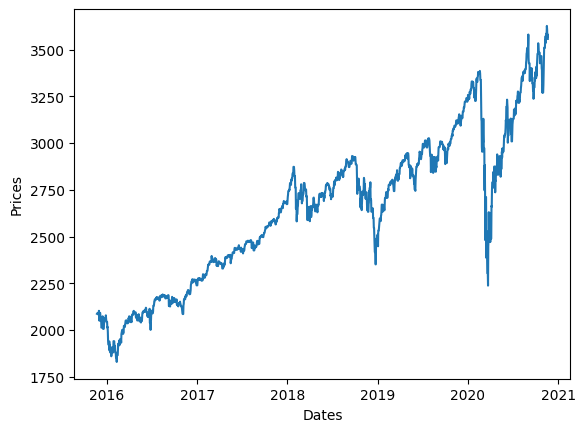

In [5]:
dates = df['Date']
prices = df['Close']
plt.plot(dates, prices)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot()

This will be used later to compare the predicted stock value with the actual stock value.

Data manipulation: 

Data needs to be loaded into training and testing 2D arrays (70-30 split respectively)

Machine learning models work better with scaled data and so relative maximum scaling (simplest technique) will be used to scale the values between 0 and 1 

In [6]:
data = np.array(df)
data_rows, data_columns = data.shape

input_data = data[:,1:]
input_data = input_data.T
idata_rows, idata_columns = input_data.shape
for i in range(idata_rows):
    input_data[i] = input_data[i] / np.max(input_data[i])

x = np.array(input_data[0:-1, :])
y = np.array(input_data[-1, :])

print(y.shape)
print(y)
print(x.shape)
print(x)

(1825,)
[0.575307944952342 0.5760109690312043 0.5759365872553825 ...
 0.983699657715678 0.9875817717856786 0.9808735605010528]
(5, 1825)
[[0.5747712178990376 0.5743625524874246 0.5740553335967881 ...
  0.9926220581861773 0.9833323681176646 0.9822380176090391]
 [0.578138178268788 0.5750550224447919 0.5795020499078319 ...
  0.9908810067323476 0.9843562993376278 0.987970030482357]
 [0.5784490035122292 0.5770675346456088 0.578418588157871 ... 1.0
  0.9854155974196179 0.9909249137752957]
 [0.39669463519479387 0.42952605340813227 0.3154270627296237 ...
  0.5831543148521398 0.4806355994511697 0.24729005969248255]
 [0.575307944952342 0.5760109690312043 0.5759365872553825 ...
  0.983699657715678 0.9875817717856786 0.9808735605010528]]


[]

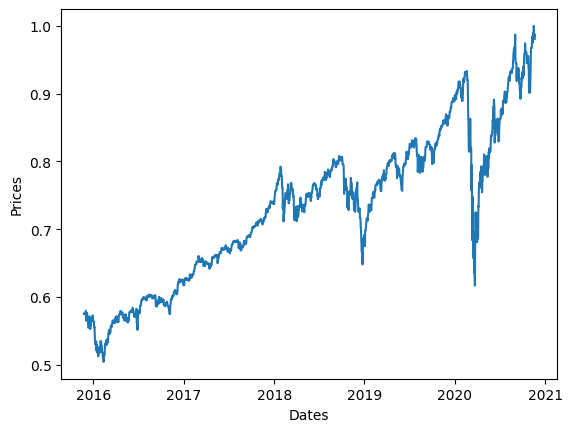

In [7]:
dates = df['Date']
prices = y
plt.plot(dates, prices)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot()

In [8]:
train_range = 1248

y_train = np.array(y[0:(train_range)])
x_train = np.array(x[:, 0:(train_range)])

y_test = np.array(y[(train_range):])
x_test = np.array(x[:, (train_range):])

print(f'y train shape: {y_train.shape}')
# print(y_train)
print(f'x train shape: {x_train.shape}')
print(len(x_train))
#print(x_train)
print(f'y test shape: {y_test.shape}')
#print(y_test)
print(f'x test shape: {x_test.shape}')
#print(x_test)


y train shape: (1248,)
x train shape: (5, 1248)
5
y test shape: (577,)
x test shape: (5, 577)


Fixing batch error.
Number of samples should be a multiple of 32

In [9]:
n, m = x_train.shape

print(f'{m}')
print(f'{m % 32}')

1248
0
